# Reading Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('D:\\datasets\\quora\\quora-question-pairs\\train.csv\\train.csv')

print('No of data-points : ',data.shape[0])
data.head(5)


No of data-points :  404290


,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


# Distribution of data points among output classes

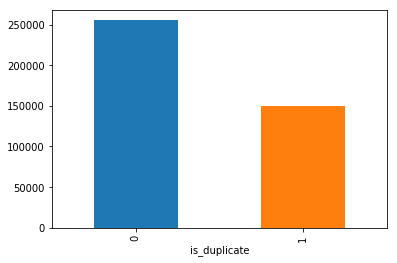

In [3]:
data.groupby('is_duplicate')['id'].count().plot.bar()

The quetions which are duplicates count is less than questions which are not duplicates

In [4]:
print('=>Question pairs are not Similar (is_duplicate = 0):\n   {}%'.format(100 - round(data['is_duplicate'].mean()*100, 2)))
print('\n=> Question pairs are Similar (is_duplicate = 1):\n   {}%'.format(round(data['is_duplicate'].mean()*100, 2)))

=>Question pairs are not Similar (is_duplicate = 0):
   63.08%

=> Question pairs are Similar (is_duplicate = 1):
   36.92%


# Count of unique Questions

In [5]:
qids = pd.Series(data['qid1'].tolist() + data['qid2'].tolist())
unique_qs = len(np.unique(qids))
qs_morethan_onetime = np.sum(qids.value_counts() > 1)
print ('Total number of  Unique Questions are: {}\n'.format(unique_qs))
#print len(np.unique(qids))

print ('Number of unique questions that appear more than one time: {} ({}%)\n'.format(qs_morethan_onetime,qs_morethan_onetime/unique_qs*100))

print ('Max number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

q_vals=qids.value_counts()

q_vals=q_vals.values

Total number of  Unique Questions are: 537933

Number of unique questions that appear more than one time: 111780 (20.77953945937505%)

Max number of times a single question is repeated: 157



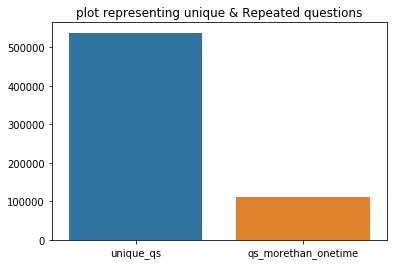

In [6]:
x=['unique_qs','qs_morethan_onetime']
y=[unique_qs,qs_morethan_onetime]
sns.barplot(x,y)
plt.title('plot representing unique & Repeated questions' )
plt.show()

# checking for duplicate rows

In [7]:
dup_pairs=data[['qid1','qid2','is_duplicate']].groupby(['qid1','qid2']).count().reset_index()
print('Total no. of duplicate questions : {}'.format(data.shape[0]-dup_pairs.shape[0]))

Total no. of duplicate questions : 0


# Number of occurences of each question

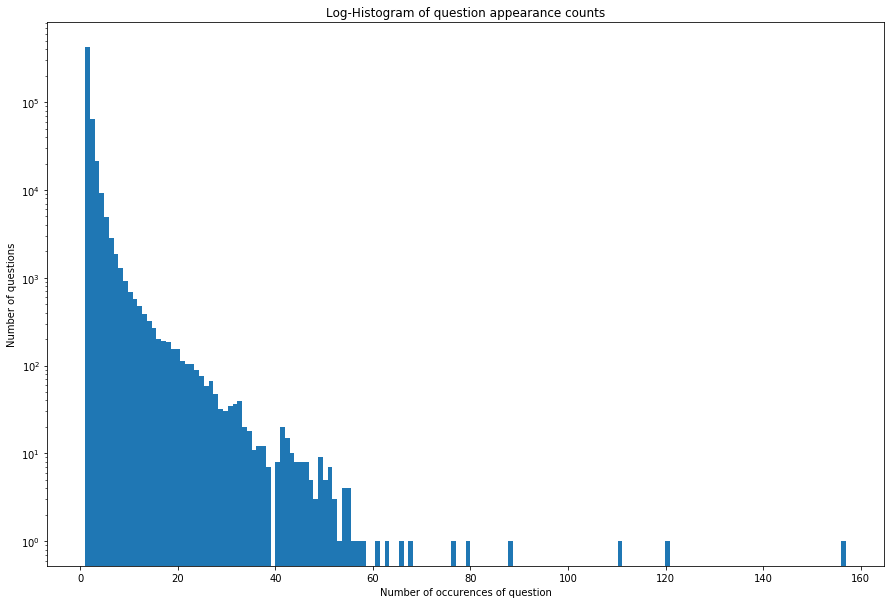

Max no. of times a single question is repeated: 157


In [8]:
plt.figure(figsize=(15, 10))
plt.hist(qids.value_counts(),bins=160)
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of questions')
plt.show()
print('Max no. of times a single question is repeated: {}'.format(max(qids.value_counts())))

# NAN Check

In [9]:
data[data.isnull().any(1)]

,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0
201841,201841,303951,174364,How can I create an Android app?,NaN,0
363362,363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English na...,0


there are total 3 rows with null 

1.question1- 1 

2.question2- 2

In [10]:
data=data.fillna('')
print(data.isnull().sum())
data=data.sample(n=100000,random_state=1)
data.to_csv("D:\\datasets\\quora\\quora-question-pairs\\train.csv\\train_data.csv")
data.shape


id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64


(100000, 6)

# Basic Feature Extraction (before cleaning)

Let us now construct a few features like:<br />
    •	freq_qid1 = Frequency of qid1's<br />
    •	freq_qid2 = Frequency of qid2's<br />
    •	q1len = Length of q1<br />
    •	q2len = Length of q2<br />
    •	q1_n_words = Number of words in Question 1<br />
    •	q2_n_words = Number of words in Question 2<br />
    •	word_Common = (Number of common unique words in Question 1 and Question 2)<br />
    •	word_Total =(Total num of words in Question 1 + Total num of words in Question 2)<br />
    •	word_share = (word_common)/(word_Total)<br />
    •	freq_q1+freq_q2 = sum total of frequency of qid1 and qid2<br />
    •	freq_q1-freq_q2 = absolute difference of frequency of qid1 and qid2<br />


In [11]:
import os

if os.path.isfile('D:\\datasets\\quora\\quora-question-pairs\\train.csv\\train_data_new_feat.csv'):
    data = pd.read_csv('D:\\datasets\\quora\\quora-question-pairs\\train.csv\\train_data_new_feat.csv',encoding='latin-1')

else:
    data['freq_qid1'] = data.groupby('qid1')['qid1'].transform('count') 
    data['freq_qid2'] = data.groupby('qid2')['qid2'].transform('count')
    data['q1len'] = data['question1'].str.len() 
    data['q2len'] = data['question2'].str.len()
    data['q1_n_words'] = data['question1'].apply(lambda row: len(row.split(" ")))
    data['q2_n_words'] = data['question2'].apply(lambda row: len(row.split(" ")))

    def normalized_word_Common(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" "))) 
        return 1.0 * len(w1 & w2)
    
    data['word_Common'] = data.apply(normalized_word_Common,axis=1)

    def normalized_word_Total(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" "))) 
        return 1.0 * (len(w1) + len(w2))
    
    data['word_Total'] = data.apply(normalized_word_Total,axis=1)

    def normalized_word_Share(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" "))) 
        return 1.0 * ((len(w1 & w2))/((len(w1) + len(w2))))
                      
    data['word_share'] = data.apply(normalized_word_Share,axis=1)
                      
    data['freq_q1+freq_q2'] = data['freq_qid1']+data['freq_qid2']
    data['freq_q1-freq_q2'] =abs(data['freq_qid1']-data['freq_qid2'])
    
    #data.head(5)

    data.to_csv('D:\\datasets\\quora\\quora-question-pairs\\train.csv\\train_data_new_feat.csv')

data.head(5)

,Unnamed: 0,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+freq_q2,freq_q1-freq_q2
0,237030,237030,33086,348102,How can I stop playing video games?,Should I stop playing video games with my child?,0,1,1,35,48,7,9,4.0,16.0,0.250000,2,0
1,247341,247341,73272,8624,Who is better Donald Trump or Hillary Clinton?,Why is Hillary Clinton a better choice than Do...,1,6,3,46,57,8,10,4.0,18.0,0.222222,9,3
2,246425,246425,359482,359483,What do you think is the chance that sometime ...,Do you think there will be another world war/n...,1,1,1,139,77,28,14,12.0,39.0,0.307692,2,0
3,306985,306985,1357,47020,Why are so many questions posted to Quora that...,Why do people write questions on Quora that co...,1,6,7,86,86,16,16,5.0,30.0,0.166667,13,1
4,225863,225863,334315,334316,Can there even be a movie ever rated 10/10 on ...,What are your 10/10 movies?,0,1,1,51,27,11,5,1.0,16.0,0.062500,2,0


# Analysis on Extracted Features

In [12]:
print ("Minimum length of the questions in question1 : " , min(data['q1_n_words'])) # o/p =1
print ("Minimum length of the questions in question2 : " , min(data['q2_n_words'])) # o/p =1
print ("Number of Questions with minimum length [question1] : ", data[data['q1_n_words']== 1].shape[0])
print ("Number of Questions with minimum length [question2] : ", data[data['q2_n_words']== 1].shape[0])

Minimum length of the questions in question1 :  1
Minimum length of the questions in question2 :  1
Number of Questions with minimum length [question1] :  19
Number of Questions with minimum length [question2] :  4


# Feature : word_share

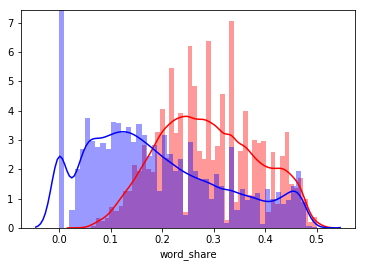

In [13]:
sns.distplot(data[data['is_duplicate'] == 1.0]['word_share'][0:] , label = "1", color = 'red')
sns.distplot(data[data['is_duplicate'] == 0.0]['word_share'][0:] , label = "0" , color = 'blue' )
plt.show()

There is overlap on word_share for similar(1) and dissimlar questions(0)

# Feature : word_Common

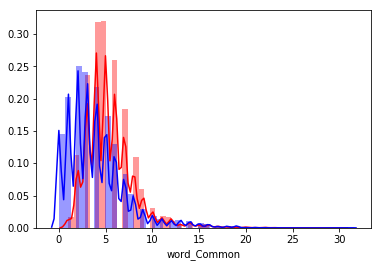

In [14]:
sns.distplot(data[data['is_duplicate'] == 1.0]['word_Common'][0:] , label = "1", color = 'red')
sns.distplot(data[data['is_duplicate'] == 0.0]['word_Common'][0:] , label = "0" , color = 'blue' )
plt.show()


There is overlap on word_Common for similar(1) and dissimlar questions(0)

# PreProcessing Text

Preprocessing:<br/>
    1.Removing html tags<br/>
    2.Removing Punctuations<br/>
    3.Performing stemming<br/>
    4.Removing Stopwords<br/>
    5.Expanding contractions etc.

In [15]:
import nltk
from nltk.corpus import stopwords
#python -m nltk.downloader stopwords ---in command promt

In [16]:
STOP_WORDS = stopwords.words("english")

In [17]:
import re
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
SAFE_DIV = 0.0001
def preprocess(x):
    
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    
    porter = PorterStemmer()
    pattern = re.compile('\W')
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x) #This matches any non-alphanumeric character [^a-zA-Z0-9]
    
    
    if type(x) == type(''):
        x = porter.stem(x)
        example1 = BeautifulSoup(x)
        x = example1.get_text()
    return x

# Advanced Feature Extraction (NLP and Fuzzy Features)

Definition:<br/>

Token: You get a token by splitting sentence a space<br/>
Stop_Word : stop words as per NLTK.<br/>
Word : A token that is not a stop_word<br/>
Features:<br/>
<br/>
cwc_min : Ratio of common_word_count to min lenghth of word count of Q1 and Q2<br/>
cwc_min = common_word_count / (min(len(q1_words), len(q2_words))<br/>
<br/>
cwc_max : Ratio of common_word_count to max lenghth of word count of Q1 and Q2<br/>
cwc_max = common_word_count / (max(len(q1_words), len(q2_words))<br/><br/>

csc_min : Ratio of common_stop_count to min lenghth of stop count of Q1 and Q2<br/>
csc_min = common_stop_count / (min(len(q1_stops), len(q2_stops))<br/><br/>

csc_max : Ratio of common_stop_count to max lenghth of stop count of Q1 and Q2<br/>
csc_max = common_stop_count / (max(len(q1_stops), len(q2_stops))<br/><br/>

ctc_min : Ratio of common_token_count to min lenghth of token count of Q1 and Q2<br/>
ctc_min = common_token_count / (min(len(q1_tokens), len(q2_tokens))<br/><br/>


ctc_max : Ratio of common_token_count to max lenghth of token count of Q1 and Q2<br/>
ctc_max = common_token_count / (max(len(q1_tokens), len(q2_tokens))<br/><br/>


last_word_eq : Check if First word of both questions is equal or not<br/>
last_word_eq = int(q1_tokens[-1] == q2_tokens[-1])<br/><br/>


first_word_eq : Check if First word of both questions is equal or not<br/>
first_word_eq = int(q1_tokens[0] == q2_tokens[0])<br/><br/>


abs_len_diff : Abs. length difference<br/>
abs_len_diff = abs(len(q1_tokens) - len(q2_tokens))<br/><br/>


mean_len : Average Token Length of both Questions<br/>
mean_len = (len(q1_tokens) + len(q2_tokens))/2<br/><br/>


fuzz_ratio : https://github.com/seatgeek/fuzzywuzzy#usage http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/<br/>


fuzz_partial_ratio : https://github.com/seatgeek/fuzzywuzzy#usage http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/<br/>


token_sort_ratio : https://github.com/seatgeek/fuzzywuzzy#usage http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/<br/>

token_set_ratio : https://github.com/seatgeek/fuzzywuzzy#usage http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/<br/><br/>

longest_substr_ratio : Ratio of length longest common substring to min lenghth of token count of Q1 and Q2<br/>
longest_substr_ratio = len(longest common substring) / (min(len(q1_tokens), len(q2_tokens))<br/>

In [18]:

import distance
def get_token_features(que1,que2):
    token_features=[0.0]*10
    
    q1_tokens=que1.split()
    q2_tokens=que2.split()
  
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
     return token_features
    
    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    token_features[8] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    token_features[9] = (len(q1_tokens) + len(q2_tokens))/2
    return token_features
        
#print(data[data['question2'].isnull()])   
# get the Longest Common sub string

def get_longest_substr_ratio(que1, que2):
    strs = list(distance.lcsubstrings(que1, que2))
    if len(strs) == 0:
        return 0
    else:
        return len(strs[0]) / (min(len(que1), len(que2)) + 1)

In [19]:
from fuzzywuzzy import fuzz

def extract_features(data):
    # preprocessing each question
    data['question1'] = data['question1'].fillna("").apply(preprocess)
    data['question2'] = data['question2'].fillna("").apply(preprocess)
    
    print('token features...')
    
    token_features = data.apply(lambda x: get_token_features(x['question1'], x['question2']), axis=1)
    
    data['cwc_min']       = list(map(lambda x: x[0], token_features))
    data['cwc_max']       = list(map(lambda x: x[1], token_features))
    data['csc_min']       = list(map(lambda x: x[2], token_features))
    data['csc_max']       = list(map(lambda x: x[3], token_features))
    data['ctc_min']       = list(map(lambda x: x[4], token_features))
    data['ctc_max']       = list(map(lambda x: x[5], token_features))
    data['last_word_eq']  = list(map(lambda x: x[6], token_features))
    data['first_word_eq'] = list(map(lambda x: x[7], token_features))
    data['abs_len_diff']  = list(map(lambda x: x[8], token_features))
    data['mean_len']      = list(map(lambda x: x[9], token_features))
    
    print('fuzzy features..')

    data['token_set_ratio']       = data.apply(lambda x: fuzz.token_set_ratio(x['question1'], x['question2']), axis=1)
    # The token sort approach involves tokenizing the string in question, sorting the tokens alphabetically, and 
    # then joining them back into a string We then compare the transformed strings with a simple ratio().
    data['token_sort_ratio']      = data.apply(lambda x: fuzz.token_sort_ratio(x['question1'], x['question2']), axis=1)
    data['fuzz_ratio']            = data.apply(lambda x: fuzz.QRatio(x['question1'], x['question2']), axis=1)
    data['fuzz_partial_ratio']    = data.apply(lambda x: fuzz.partial_ratio(x['question1'], x['question2']), axis=1)
          
    data['longest_substr_ratio']  = data.apply(lambda x: get_longest_substr_ratio(x['question1'],x['question2']),axis=1)
          
    return data

In [20]:

if os.path.isfile('D:\\datasets\\quora\\quora-question-pairs\\train.csv\\nlp_features_train_data.csv'):
    data = pd.read_csv('D:\\datasets\\quora\\quora-question-pairs\\train.csv\\nlp_features_train_data.csv',encoding='latin-1')
    data.fillna('')
else:
    print('Extracting features for train_data:')
    df_temp = pd.read_csv('D:\\datasets\\quora\\quora-question-pairs\\train.csv\\train_data.csv')
    data = extract_features(df_temp)
    data.to_csv('D:\\datasets\\quora\\quora-question-pairs\\train.csv\\nlp_features_train_data.csv', index=False)
data.head(8)

,Unnamed: 0,id,qid1,qid2,question1,question2,is_duplicate,cwc_min,cwc_max,csc_min,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,237030,237030,33086,348102,how can i stop playing video games,should i stop playing video games with my child,0,0.999975,0.799984,0.333322,...,0.555549,0.0,0.0,2.0,8.0,87,69,72,86,0.777778
1,247341,247341,73272,8624,who is better donald trump or hillary clinton,why is hillary clinton a better choice than do...,1,0.999980,0.833319,0.333322,...,0.599994,0.0,0.0,2.0,9.0,92,83,42,50,0.361702
2,246425,246425,359482,359483,what do you think is the chance that sometime ...,do you think there will be another world war n...,1,0.857131,0.499996,0.999986,...,0.464284,0.0,0.0,13.0,21.5,94,70,46,56,0.294872
3,306985,306985,1357,47020,why are so many questions posted to quora that...,why do people write questions on quora that co...,1,0.374995,0.333330,0.333328,...,0.312498,0.0,1.0,0.0,16.0,59,51,53,52,0.137931
4,225863,225863,334315,334316,can there even be a movie ever rated 10 10 on ...,what are your 10 10 movies,0,0.499975,0.166664,0.000000,...,0.083333,0.0,0.0,6.0,9.0,46,50,42,48,0.250000
5,259303,259303,6304,375056,which is correct each of you is or each of ...,what is the difference between leafs and leave...,0,0.999900,0.166664,0.285710,...,0.187499,0.0,0.0,4.0,14.0,60,52,32,48,0.163636
6,224788,224788,94113,46020,will you marry a girl who is not virgin,would you marry a non virgin woman,1,0.666644,0.399992,0.999950,...,0.444440,0.0,0.0,2.0,8.0,74,74,66,63,0.361111
7,393492,393492,71478,374655,what is a good torrent download site,what are the best sites for torrent download,0,0.499988,0.499988,0.333322,...,0.374995,0.0,1.0,1.0,7.5,75,75,65,73,0.473684


# Analysis of extracted features

We can find most frequently occuring words in word cloud

In [21]:
data_duplicate = data[data['is_duplicate'] == 1]
data_nonduplicate = data[data['is_duplicate'] == 0]

pairs=np.dstack([data_duplicate['question1'],data_duplicate['question2']]).flatten()
#print(pairs[0])
not_pairs=np.dstack([data_nonduplicate['question1'],data_nonduplicate['question2']]).flatten()

print('no. of data points(ques) in class 1:',len(pairs))
print('no. of data points(ques) in class 0:',len(not_pairs))

#Saving the np array into a text file
np.savetxt('D:\\datasets\\quora\\quora-question-pairs\\train.csv\\train_pairs.txt', pairs, delimiter=' ', fmt='%s',encoding='utf-8')
np.savetxt('D:\\datasets\\quora\\quora-question-pairs\\train.csv\\train_not_pairs.txt', not_pairs, delimiter=' ', fmt='%s',encoding='utf-8')


no. of data points(ques) in class 1: 73876
no. of data points(ques) in class 0: 126124


In [22]:
from os import path
from wordcloud import WordCloud,STOPWORDS
directory = path.dirname('D:\\datasets\\quora\\quora-question-pairs\\train.csv\\')

text_pairs_words = open(path.join(directory, 'train_pairs.txt'),encoding='utf-8').read()
text_not_pairs_words = open(path.join(directory, 'train_not_pairs.txt'),encoding='utf-8').read()

stopwords1=set(STOPWORDS)
stopwords1.remove('not')
stopwords1.remove('no')
stopwords1.remove('like')
print('no. of words in similar questions: ',len(text_pairs_words))
print('no. of words in non-similar questions: ',len(text_not_pairs_words))

no. of words in similar questions:  3992777
no. of words in non-similar questions:  8203776


Word Cloud for Duplicate Question pairs


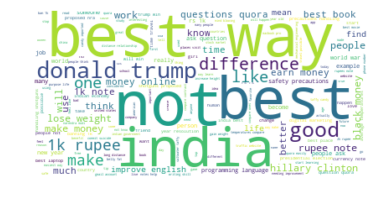

In [23]:
wc = WordCloud(background_color="white", max_words=len(text_pairs_words), stopwords=stopwords1)
wc.generate(text_pairs_words)
print('Word Cloud for Duplicate Question pairs')
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Word Cloud for non-Duplicate Question pairs


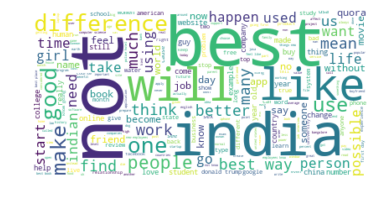

In [24]:
wc = WordCloud(background_color="white", max_words=len(text_not_pairs_words), stopwords=stopwords1)
wc.generate(text_not_pairs_words)
print ('Word Cloud for non-Duplicate Question pairs')
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# Pair Plots for fuzzy features

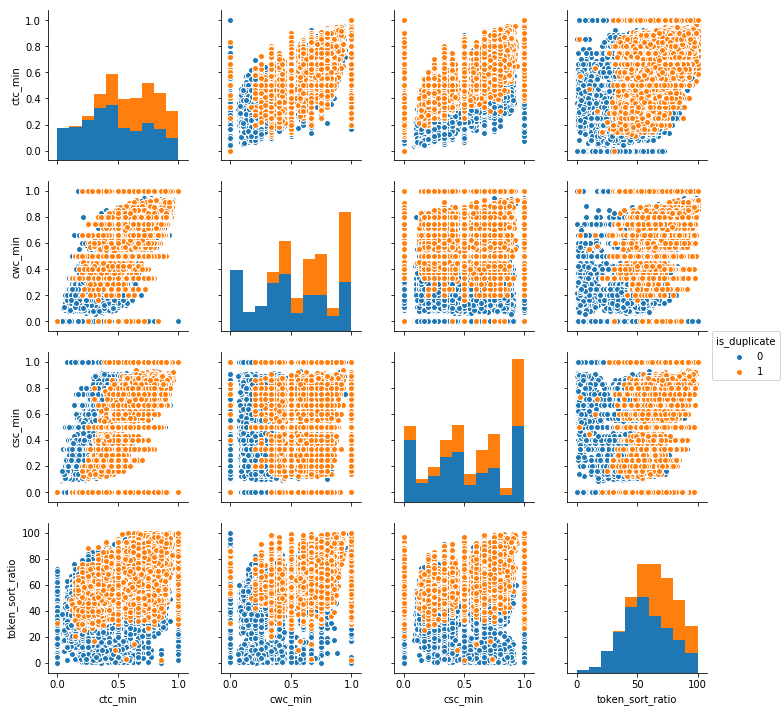

In [25]:
n=data.shape[0]
sns.pairplot(data[['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio', 'is_duplicate']][0:n],hue='is_duplicate',
             vars=['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio'])
plt.show()

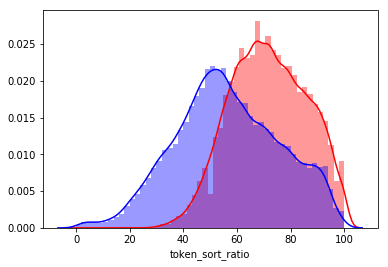

In [26]:
# Distibution of token_sort_ratio
sns.distplot(data[data['is_duplicate'] == 1.0]['token_sort_ratio'][0:] , label = "1", color = 'red')
sns.distplot(data[data['is_duplicate'] == 0.0]['token_sort_ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

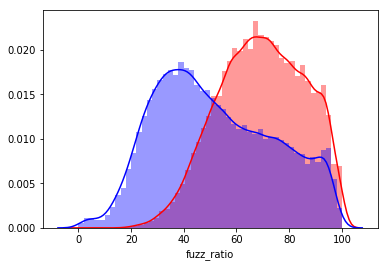

In [27]:
# Distibution of fuzz_ratio
sns.distplot(data[data['is_duplicate'] == 1.0]['fuzz_ratio'][0:] , label = "1", color = 'red')
sns.distplot(data[data['is_duplicate'] == 0.0]['fuzz_ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

# T-SNE (Visualization)

In [28]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler

data_subsampled=data[0:5000]
scalar=MinMaxScaler()
X=scalar.fit_transform(data_subsampled[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 
                                         'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 
                                         'token_set_ratio' , 'token_sort_ratio' ,  
                                         'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
Y=data_subsampled['is_duplicate'].values

tsne=TSNE(n_components=2,init='random',
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5).fit_transform(X)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.009s...
[t-SNE] Computed neighbors for 5000 samples in 0.311s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.146696
[t-SNE] Computed conditional probabilities in 0.180s
[t-SNE] Iteration 50: error = 82.6554642, gradient norm = 0.0480627 (50 iterations in 6.464s)
[t-SNE] Iteration 100: error = 70.8466949, gradient norm = 0.0096550 (50 iterations in 5.514s)
[t-SNE] Iteration 150: error = 69.0575714, gradient norm = 0.0060594 (50 iterations in 4.639s)
[t-SNE] Iteration 200: error = 68.3331833, gradient norm = 0.0038701 (50 iterations in 4.481s)
[t-SNE] Iteration 250: error = 67.8927155, gradient norm = 0.0033770

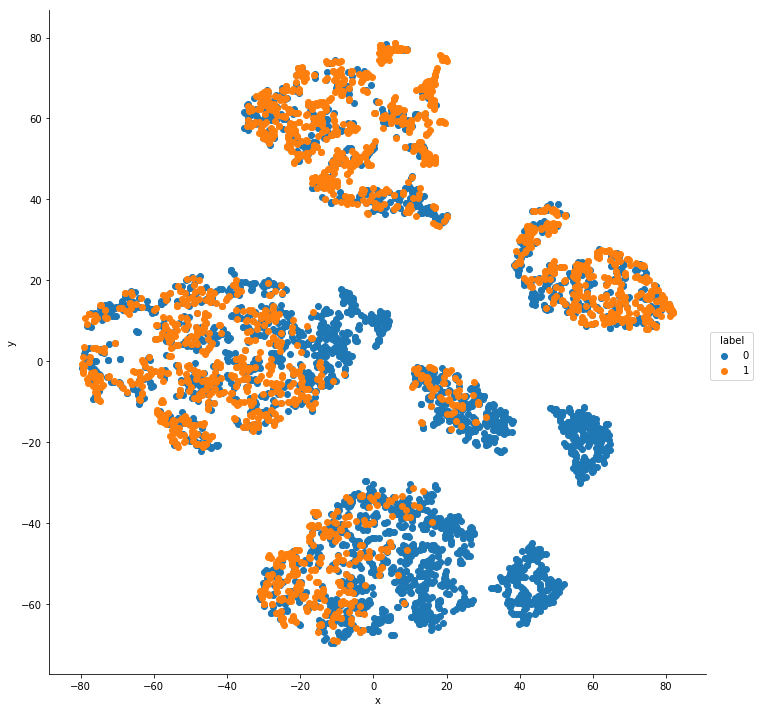

In [29]:
tsne_df = pd.DataFrame(tsne, columns = ('x','y'))
tsne_df['label']=Y
sns.FacetGrid(tsne_df,hue='label',size=10).map(plt.scatter, 'x', 'y').add_legend()
plt.show()

# Featurizing Text data

In [30]:

feat_data=pd.read_csv('D:\\datasets\\quora\\quora-question-pairs\\train.csv\\train_data.csv')
print(feat_data.columns)
feat_data['question1']=feat_data['question1'].apply(lambda x:str(x))
feat_data['question2']=feat_data['question2'].apply(lambda x:str(x))

Index(['Unnamed: 0', 'id', 'qid1', 'qid2', 'question1', 'question2',
       'is_duplicate'],
      dtype='object')


In [31]:
data_nlp=pd.read_csv('D:\\datasets\\quora\\quora-question-pairs\\train.csv\\nlp_features_train_data.csv')
data_N_PrePro=pd.read_csv('D:\\datasets\\quora\\quora-question-pairs\\train.csv\\train_data_new_feat.csv')
data_nlp1=data_nlp.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)
data_N_PrePro1=data_N_PrePro.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)
data_1=data_nlp[['id','question1','question2']]

duplicate = data_nlp.is_duplicate

print(data_nlp1.isnull().sum())
print(data_N_PrePro1.isnull().sum())
print(data_1.isnull().sum())

Unnamed: 0              0
id                      0
cwc_min                 0
cwc_max                 0
csc_min                 0
csc_max                 0
ctc_min                 0
ctc_max                 0
last_word_eq            0
first_word_eq           0
abs_len_diff            0
mean_len                0
token_set_ratio         0
token_sort_ratio        0
fuzz_ratio              0
fuzz_partial_ratio      0
longest_substr_ratio    0
dtype: int64
Unnamed: 0         0
id                 0
freq_qid1          0
freq_qid2          0
q1len              0
q2len              0
q1_n_words         0
q2_n_words         0
word_Common        0
word_Total         0
word_share         0
freq_q1+freq_q2    0
freq_q1-freq_q2    0
dtype: int64
id           0
question1    5
question2    1
dtype: int64


In [32]:
data_1 = data_1.fillna(' ')
print(data_nlp1.columns)
print(data_N_PrePro1.columns)
print(data_1.columns)
data_nlp1=data_nlp1.drop(['Unnamed: 0'],axis=1)


Index(['Unnamed: 0', 'id', 'cwc_min', 'cwc_max', 'csc_min', 'csc_max',
       'ctc_min', 'ctc_max', 'last_word_eq', 'first_word_eq', 'abs_len_diff',
       'mean_len', 'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
       'fuzz_partial_ratio', 'longest_substr_ratio'],
      dtype='object')
Index(['Unnamed: 0', 'id', 'freq_qid1', 'freq_qid2', 'q1len', 'q2len',
       'q1_n_words', 'q2_n_words', 'word_Common', 'word_Total', 'word_share',
       'freq_q1+freq_q2', 'freq_q1-freq_q2'],
      dtype='object')
Index(['id', 'question1', 'question2'], dtype='object')


In [33]:
data_N_PrePro1['id']=data_nlp1['id']
ques_df=pd.DataFrame()
ques_df['questions']=data_1['question1']+' '+data_1['question2']
ques_df['id'] = data_1.id
ques_df.head(5)
final_data= data_nlp1.merge(data_N_PrePro1, on='id',how='left')
X=final_data.merge(ques_df, on='id',how='left')

In [34]:
X=X.drop(['id','Unnamed: 0'],axis=1)
X.columns

Index(['cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max',
       'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
       'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
       'fuzz_partial_ratio', 'longest_substr_ratio', 'freq_qid1', 'freq_qid2',
       'q1len', 'q2len', 'q1_n_words', 'q2_n_words', 'word_Common',
       'word_Total', 'word_share', 'freq_q1+freq_q2', 'freq_q1-freq_q2',
       'questions'],
      dtype='object')

In [35]:
Y=np.array(duplicate)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=21,test_size=0.3)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(70000, 27)
(70000,)
(30000, 27)
(30000,)


In [36]:
#seperating questions for tfidf vectorizer
X_train_ques=X_train['questions']
X_test_ques=X_test['questions']

X_train=X_train.drop('questions',axis=1)
X_test=X_test.drop('questions',axis=1)

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

tfidf = TfidfVectorizer(lowercase=False )
tfidf.fit_transform(X_train_ques)

# dict key:word and value:tf-idf score
word2tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))

In [45]:
import tqdm
import spacy
# en_vectors_web_lg, which includes over 1 million unique vectors.
#for train dataset
print(os.path.dirname(spacy.__file__))

nlp = spacy.load('en_core_web_sm')
a=list(X_train_ques)
len(nlp(a[0]))
print(a[0])

D:\Python1\lib\site-packages\spacy
how much sleep should adults have in 24 hours ideally  how much time for sleep does one need in a day 


In [42]:
nlp